<a href="https://colab.research.google.com/github/hxxzn/DS_udangtang_tp/blob/main/DS_udangtang_tp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1.라이브러리 & 폰트 설정

###1) 라이브러리 설정

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [105]:
#행 중간 잘리지 않게

pd.set_option('display.max_rows', None)

###2) 한글화 폰트 설정

In [106]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [107]:
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams["figure.figsize"] = (12, 9)

##2.파일 업로드

In [108]:
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1kJwY2WWf8Oq1RKd_w6lZ7D3jofJLdZYB', encoding='cp949')

In [109]:
df.head()

,지역,12.Jan,12.Feb,12.Mar,12.Apr,12.May,12.Jun,12.Jul,12.Aug,12.Sep,...,20.Sep,20.Oct,20.Nov,20.Dec,21.Jan,21.Feb,21.Mar,21.Apr,21.May,21.Jun
0,전국,264474.0,264035.0,263470.0,262630.0,261823.0,260425.0,258959.0,257163.0,255680.0,...,386235.0,387973.0,391180.0,396418.0,401083.0,406808.0,410921.0,414983.0,419019.0,426064.0
1,수도권,365249.0,364275.0,362790.0,360918.0,359253.0,356737.0,354214.0,350990.0,348174.0,...,554605.0,556292.0,559427.0,564152.0,569996.0,578553.0,584631.0,590858.0,596817.0,607706.0
2,지방권,163394.0,163491.0,163849.0,164044.0,164096.0,163820.0,163416.0,163052.0,162905.0,...,227820.0,229605.0,232881.0,238600.0,242156.0,245216.0,247481.0,249507.0,251732.0,255160.0
3,6대광역시,195186.0,194989.0,195093.0,195037.0,194851.0,194273.0,193523.0,192675.0,192214.0,...,298907.0,301505.0,306330.0,313976.0,319357.0,324733.0,329139.0,333113.0,337314.0,343728.0
4,5대광역시,190421.0,190312.0,190555.0,190603.0,190631.0,190183.0,189587.0,188896.0,188635.0,...,292516.0,295565.0,301179.0,310102.0,315661.0,320582.0,324076.0,326852.0,330023.0,335004.0


##3.데이터 전처리

In [110]:
#NaN 개수 확인

df.isna().sum()

지역        0
12.Jan    7
12.Feb    7
12.Mar    7
12.Apr    7
12.May    7
12.Jun    7
12.Jul    7
12.Aug    7
12.Sep    7
12.Oct    7
12.Nov    7
12.Dec    7
13.Jan    7
13.Feb    7
13.Mar    7
13.Apr    7
13.May    7
13.Jun    7
13.Jul    7
13.Aug    7
13.Sep    7
13.Oct    7
13.Nov    7
13.Dec    7
14.Jan    7
14.Feb    7
14.Mar    7
14.Apr    7
14.May    7
14.Jun    7
14.Jul    6
14.Aug    6
14.Sep    6
14.Oct    6
14.Nov    6
14.Dec    6
15.Jan    6
15.Feb    6
15.Mar    6
15.Apr    6
15.May    6
15.Jun    6
15.Jul    6
15.Aug    6
15.Sep    6
15.Oct    6
15.Nov    6
15.Dec    6
16.Jan    6
16.Feb    6
16.Mar    6
16.Apr    6
16.May    6
16.Jun    6
16.Jul    9
16.Aug    9
16.Sep    9
16.Oct    9
16.Nov    9
16.Dec    9
17.Jan    9
17.Feb    9
17.Mar    9
17.Apr    9
17.May    9
17.Jun    9
17.Jul    9
17.Aug    9
17.Sep    9
17.Oct    9
17.Nov    9
17.Dec    9
18.Jan    9
18.Feb    9
18.Mar    9
18.Apr    9
18.May    9
18.Jun    9
18.Jul    9
18.Aug    9
18.Sep    9
18.Oct    9
18.N

In [111]:
#NaN 행 삭제

df = df.dropna()

In [112]:
#행렬 전환

df = df.rename({'지역' : '날짜'}, axis=1)
df = df.set_index('날짜')
df = df.transpose()
df.head()

날짜,전국,수도권,지방권,6대광역시,5대광역시,9개도,8개도,서울,서울 강북지역,서울 도심권,...,경남 진주시,경남 통영시,경남 사천시,경남 김해시,경남 밀양시,경남 거제시,경남 양산시,제주,제주 제주시,제주 서귀포시
12.Jan,264474.0,365249.0,163394.0,195186.0,190421.0,211371.0,139237.0,540954.0,405962.0,706316.0,...,157468.0,143155.0,101292.0,172711.0,105897.0,181049.0,130287.0,134994.0,145425.0,80868.0
12.Feb,264035.0,364275.0,163491.0,194989.0,190312.0,211340.0,139518.0,538876.0,405406.0,705830.0,...,157582.0,143155.0,101292.0,171124.0,105897.0,181585.0,130202.0,139424.0,150436.0,82283.0
12.Mar,263470.0,362790.0,163849.0,195093.0,190555.0,211142.0,139979.0,536079.0,404184.0,702286.0,...,159802.0,143507.0,101519.0,169589.0,105897.0,182488.0,129489.0,139830.0,150769.0,83067.0
12.Apr,262630.0,360918.0,164044.0,195037.0,190603.0,210804.0,140306.0,532409.0,402746.0,701482.0,...,159814.0,143162.0,101519.0,168874.0,105971.0,183663.0,128351.0,141365.0,152481.0,83683.0
12.May,261823.0,359253.0,164096.0,194851.0,190631.0,210270.0,140378.0,529733.0,401085.0,700462.0,...,159700.0,143207.0,101519.0,168084.0,105971.0,183272.0,127287.0,144561.0,155972.0,85350.0


In [113]:
#datetime으로 변환
#날짜를 index로

df = df.reset_index()
df['index'] = pd.to_datetime(df['index'], format='%y.%b')
df = df.rename({'index' : '날짜'}, axis=1)
df = df.set_index('날짜')
df.head()

날짜,전국,수도권,지방권,6대광역시,5대광역시,9개도,8개도,서울,서울 강북지역,서울 도심권,...,경남 진주시,경남 통영시,경남 사천시,경남 김해시,경남 밀양시,경남 거제시,경남 양산시,제주,제주 제주시,제주 서귀포시
날짜,,,,,,,,,,,,,,,,,,,,,
2012-01-01,264474.0,365249.0,163394.0,195186.0,190421.0,211371.0,139237.0,540954.0,405962.0,706316.0,...,157468.0,143155.0,101292.0,172711.0,105897.0,181049.0,130287.0,134994.0,145425.0,80868.0
2012-02-01,264035.0,364275.0,163491.0,194989.0,190312.0,211340.0,139518.0,538876.0,405406.0,705830.0,...,157582.0,143155.0,101292.0,171124.0,105897.0,181585.0,130202.0,139424.0,150436.0,82283.0
2012-03-01,263470.0,362790.0,163849.0,195093.0,190555.0,211142.0,139979.0,536079.0,404184.0,702286.0,...,159802.0,143507.0,101519.0,169589.0,105897.0,182488.0,129489.0,139830.0,150769.0,83067.0
2012-04-01,262630.0,360918.0,164044.0,195037.0,190603.0,210804.0,140306.0,532409.0,402746.0,701482.0,...,159814.0,143162.0,101519.0,168874.0,105971.0,183663.0,128351.0,141365.0,152481.0,83683.0
2012-05-01,261823.0,359253.0,164096.0,194851.0,190631.0,210270.0,140378.0,529733.0,401085.0,700462.0,...,159700.0,143207.0,101519.0,168084.0,105971.0,183272.0,127287.0,144561.0,155972.0,85350.0


In [114]:
#dytpe int로 변환

df = df.astype(int)
df.head()

날짜,전국,수도권,지방권,6대광역시,5대광역시,9개도,8개도,서울,서울 강북지역,서울 도심권,...,경남 진주시,경남 통영시,경남 사천시,경남 김해시,경남 밀양시,경남 거제시,경남 양산시,제주,제주 제주시,제주 서귀포시
날짜,,,,,,,,,,,,,,,,,,,,,
2012-01-01,264474,365249,163394,195186,190421,211371,139237,540954,405962,706316,...,157468,143155,101292,172711,105897,181049,130287,134994,145425,80868
2012-02-01,264035,364275,163491,194989,190312,211340,139518,538876,405406,705830,...,157582,143155,101292,171124,105897,181585,130202,139424,150436,82283
2012-03-01,263470,362790,163849,195093,190555,211142,139979,536079,404184,702286,...,159802,143507,101519,169589,105897,182488,129489,139830,150769,83067
2012-04-01,262630,360918,164044,195037,190603,210804,140306,532409,402746,701482,...,159814,143162,101519,168874,105971,183663,128351,141365,152481,83683
2012-05-01,261823,359253,164096,194851,190631,210270,140378,529733,401085,700462,...,159700,143207,101519,168084,105971,183272,127287,144561,155972,85350


##4.데이터 시각화

###1) 표 형식

In [115]:
#전국, 6대광역시, 서울, 경기
#wide area -> w

df_w = df[['전국', '서울', '경기', '6대광역시']]
df_w

날짜,전국,서울,경기,6대광역시
날짜,,,,
2012-01-01,264474,540954,283106,195186
2012-02-01,264035,538876,282765,194989
2012-03-01,263470,536079,281913,195093
2012-04-01,262630,532409,280914,195037
2012-05-01,261823,529733,279776,194851
2012-06-01,260425,525131,278318,194273
2012-07-01,258959,521123,276513,193523
2012-08-01,257163,515846,274251,192675
2012-09-01,255680,511823,271879,192214


###2) 그래프 형식

In [116]:
import plotly.express as px # express 통해서 그리기
import plotly.graph_objects as go

fig = px.line(df_w)

fig.update_layout(go.Layout(title={'text':'아파트 매매 가격 동향(2012.01 ~ 2021.06)', 
                                   'font':{'color':'#6699FF', 'size':20}}, # 타이틀
                            xaxis={'title': {'text': '날짜'}, # x축 라벨 추가, 그리드 숨김
                                   },
                            yaxis={'title': {'text': '매매가격(단위 : 천원)'} # y축 라벨 추가
                                  }))
fig.update_yaxes(tickformat=',')
fig.show()

###3) Geopandas 형식

####(1) 라이브러리 설치

In [117]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [118]:
import geopandas as gpd
from geopandas import GeoDataFrame

####(2) 데이터 전처리

#####서울

In [120]:
#데이터 불러오기

seoul_shp = gpd.read_file("/content/TL_KODIS_BAS.dbf", encoding = 'cp949')
seoul_dbf = gpd.read_file("/content/TL_KODIS_BAS.shp", encoding = 'cp949')
seoul_shx = gpd.read_file("/content/TL_KODIS_BAS.shx", encoding = 'cp949')

In [121]:
#shp 데이터 확인

seoul_shp.head()

,BAS_AR,BAS_ID,BAS_MGT_SN,CTP_KOR_NM,MVMN_DE,MVMN_RESN,NTFC_DE,OPERT_DE,SIG_CD,SIG_KOR_NM,geometry
0,0.143509,03034,1111000035,서울특별시,None,None,20121221,None,11110,종로구,"POLYGON ((952791.984 1953978.823, 952796.670 1..."
1,0.153172,03015,1111000037,서울특별시,None,None,20121221,None,11110,종로구,"POLYGON ((952092.217 1956111.385, 952106.087 1..."
2,0.046852,03018,1111000038,서울특별시,None,None,20121221,None,11110,종로구,"POLYGON ((952580.170 1955803.287, 952587.806 1..."
3,0.521175,03002,1111000111,서울특별시,None,None,20121221,None,11110,종로구,"POLYGON ((953333.378 1957708.031, 953232.695 1..."
4,0.048406,03058,1111000112,서울특별시,None,None,20121221,None,11110,종로구,"POLYGON ((954902.447 1953446.631, 954897.399 1..."


In [122]:
#shp 데이터 구별 코드로 grouping

seoul_shp = seoul_shp.dissolve(by='SIG_CD')
seoul_shp = pd.DataFrame(seoul_shp)
seoul_shp

,geometry,BAS_AR,BAS_ID,BAS_MGT_SN,CTP_KOR_NM,MVMN_DE,MVMN_RESN,NTFC_DE,OPERT_DE,SIG_KOR_NM
SIG_CD,,,,,,,,,,
11110,"POLYGON ((953057.394 1952156.595, 953025.348 1...",0.143509,03034,1111000035,서울특별시,20161027,기초구역 경계 변경에 의한 기초구역 변경,20121221,20161027000000,종로구
11140,"POLYGON ((952804.086 1950664.549, 952775.694 1...",0.038319,04565,1114000109,서울특별시,None,None,20121221,None,중구
11170,"POLYGON ((952019.674 1946337.691, 951979.151 1...",1.337127,04340,1117000049,서울특별시,None,None,20121221,None,용산구
11200,"POLYGON ((957227.032 1948870.783, 957223.162 1...",2.021590,04772,1120000021,서울특별시,None,None,20121221,None,성동구
11215,"POLYGON ((962214.874 1947201.087, 962192.513 1...",0.010083,05077,1121500001,서울특별시,None,None,20121221,None,광진구
11230,"POLYGON ((958980.310 1952608.902, 958974.125 1...",0.087569,02585,1123000086,서울특별시,20201216,기초구역 경계 변경에 의한 기초구역 변경,20121221,20201216000000,동대문구
11260,"POLYGON ((962969.331 1952558.063, 962968.654 1...",0.014593,02239,1126000139,서울특별시,20121221,국가기초구역 최초생성,20121221,20121221000000,중랑구
11290,"POLYGON ((956839.064 1953635.228, 956833.960 1...",0.145000,02837,1129000069,서울특별시,20121221,국가기초구역 최초생성,20121221,20121221000000,성북구
11305,"POLYGON ((957005.586 1957470.420, 956993.079 1...",0.039381,01029,1130500052,서울특별시,20121221,국가기초구역 최초생성,20121221,20121221000000,강북구


In [123]:
#필요한 column만 추출 후 head 확인

seoul_shp = seoul_shp[['SIG_KOR_NM', 'geometry']]
seoul_shp.head()

,SIG_KOR_NM,geometry
SIG_CD,,
11110,종로구,"POLYGON ((953057.394 1952156.595, 953025.348 1..."
11140,중구,"POLYGON ((952804.086 1950664.549, 952775.694 1..."
11170,용산구,"POLYGON ((952019.674 1946337.691, 951979.151 1..."
11200,성동구,"POLYGON ((957227.032 1948870.783, 957223.162 1..."
11215,광진구,"POLYGON ((962214.874 1947201.087, 962192.513 1..."


In [124]:
#df_seoul 데이터에서 불필요한 columns 삭제

df_seoul = df.iloc[-1:,10:40]

print(df_seoul.head())
print(df_seoul.columns)

df_seoul.drop(columns = ['서울 동북권', '서울 서북권', '서울 강남지역', '서울 서남권', '서울 동남권'], inplace=True)

날짜           서울 종로구   서울 중구   서울 용산구  서울 동북권  서울 성동구   서울 광진구  서울 동대문구  \
날짜                                                                       
2021-06-01  1050750  829486  1445073  626294  947157  1063805   695896   

날짜          서울 중랑구  서울 성북구  서울 강북구  ...  서울 구로구  서울 금천구  서울 영등포구  서울 동작구  \
날짜                                  ...                                    
2021-06-01  476457  622402  530847  ...  593008  538564   856695  888529   

날짜          서울 관악구   서울 동남권   서울 서초구   서울 강남구   서울 송파구  서울 강동구  
날짜                                                              
2021-06-01  558848  1517575  1873390  1818801  1341981  835836  

[1 rows x 30 columns]
Index(['서울 종로구', '서울 중구', '서울 용산구', '서울 동북권', '서울 성동구', '서울 광진구', '서울 동대문구',
       '서울 중랑구', '서울 성북구', '서울 강북구', '서울 도봉구', '서울 노원구', '서울 서북권', '서울 은평구',
       '서울 서대문구', '서울 마포구', '서울 강남지역', '서울 서남권', '서울 양천구', '서울 강서구', '서울 구로구',
       '서울 금천구', '서울 영등포구', '서울 동작구', '서울 관악구', '서울 동남권', '서울 서초구', '서울 강남구',
       '서울 송파구', '서

In [125]:
#잘 삭제되었는지 확인

df_seoul.columns.nunique()

25

In [126]:
#df_seoul 데이터 transpose 후 head 확인

df_seoul = pd.DataFrame(df_seoul.transpose())
df_seoul.head()

날짜,2021-06-01
날짜,
서울 종로구,1050750
서울 중구,829486
서울 용산구,1445073
서울 성동구,947157
서울 광진구,1063805


In [127]:
#seoul_shp와 df_seoul 데이터 index 재설정 후 concat

seoul_shp.reset_index(inplace=True)
df_seoul.reset_index(inplace=True)

seoul_graph = pd.concat([df_seoul, seoul_shp], axis=1)
seoul_graph.head()

,날짜,2021-06-01 00:00:00,SIG_CD,SIG_KOR_NM,geometry
0,서울 종로구,1050750,11110,종로구,"POLYGON ((953057.394 1952156.595, 953025.348 1..."
1,서울 중구,829486,11140,중구,"POLYGON ((952804.086 1950664.549, 952775.694 1..."
2,서울 용산구,1445073,11170,용산구,"POLYGON ((952019.674 1946337.691, 951979.151 1..."
3,서울 성동구,947157,11200,성동구,"POLYGON ((957227.032 1948870.783, 957223.162 1..."
4,서울 광진구,1063805,11215,광진구,"POLYGON ((962214.874 1947201.087, 962192.513 1..."


In [128]:
#그래프 시각화 위한 column 이름 변경

seoul_graph.columns = ['지역','value','구별 코드','구 명칭','geometry']
seoul_graph.columns

seoul = GeoDataFrame(seoul_graph)
seoul.head()

,지역,value,구별 코드,구 명칭,geometry
0,서울 종로구,1050750,11110,종로구,"POLYGON ((953057.394 1952156.595, 953025.348 1..."
1,서울 중구,829486,11140,중구,"POLYGON ((952804.086 1950664.549, 952775.694 1..."
2,서울 용산구,1445073,11170,용산구,"POLYGON ((952019.674 1946337.691, 951979.151 1..."
3,서울 성동구,947157,11200,성동구,"POLYGON ((957227.032 1948870.783, 957223.162 1..."
4,서울 광진구,1063805,11215,광진구,"POLYGON ((962214.874 1947201.087, 962192.513 1..."


#####경기

In [129]:
#데이터 불러오기

G_shp = gpd.read_file("/content/TL_KODIS_BAS_G.shp", encoding = 'cp949')
G_dbf = gpd.read_file("/content/TL_KODIS_BAS_G.dbf", encoding = 'cp949')
G_shx = gpd.read_file("/content/TL_KODIS_BAS_G.shx", encoding = 'cp949')

In [130]:
#shp 데이터 확인

G_shp.head()

,BAS_AR,BAS_ID,BAS_MGT_SN,CTP_KOR_NM,MVMN_DE,MVMN_RESN,NTFC_DE,OPERT_DE,SIG_CD,SIG_KOR_NM,geometry
0,0.616,16293,4111000477,경기도,20121221,국가기초구역 최초생성,20121221,20121221000000,41110,수원시,"POLYGON ((957792.821 1923248.053, 957773.566 1..."
1,0.747,16290,4111000478,경기도,20121221,국가기초구역 최초생성,20121221,20121221000000,41110,수원시,"POLYGON ((958316.161 1922421.038, 958294.114 1..."
2,0.373,16278,4111000460,경기도,20121221,국가기초구역 최초생성,20121221,20121221000000,41110,수원시,"POLYGON ((957873.608 1922388.788, 957869.303 1..."
3,0.188,16297,4111000479,경기도,20121221,국가기초구역 최초생성,20121221,20121221000000,41110,수원시,"POLYGON ((956403.226 1923654.735, 956394.744 1..."
4,0.053,16214,4111000419,경기도,20121221,국가기초구역 최초생성,20121221,20121221000000,41110,수원시,"POLYGON ((958316.161 1922421.038, 958317.137 1..."


In [131]:
#shp 데이터 구별 코드로 grouping

G_shp = G_shp.dissolve(by='SIG_CD')
G_shp = pd.DataFrame(G_shp)
G_shp

,geometry,BAS_AR,BAS_ID,BAS_MGT_SN,CTP_KOR_NM,MVMN_DE,MVMN_RESN,NTFC_DE,OPERT_DE,SIG_KOR_NM
SIG_CD,,,,,,,,,,
41110,"POLYGON ((952822.086 1915195.970, 952815.247 1...",0.616000,16293,4111000477,경기도,20121221,국가기초구역 최초생성,20121221,20121221000000,수원시
41130,"POLYGON ((964566.868 1927175.067, 964576.858 1...",0.134138,13113,4113000340,경기도,20161027,행정구역 변경에 의한 기초구역 변경,20161027,20161027000000,성남시
41150,"POLYGON ((959943.040 1965966.943, 959911.887 1...",1.171000,11814,4115000213,경기도,20151007,기초구역 경계 변경에 의한 기초구역 변경,20151007,20151007000000,의정부시
41170,"POLYGON ((948443.477 1931013.277, 948414.863 1...",0.066711,14064,4117000056,경기도,None,None,20121221,None,안양시
41190,"POLYGON ((934763.381 1942123.160, 934731.663 1...",0.085490,14724,4119000214,경기도,None,None,20121221,None,부천시
41210,"POLYGON ((942685.506 1934573.612, 942677.017 1...",0.133874,14271,4121000087,경기도,None,None,20121221,None,광명시
41220,"POLYGON ((947410.007 1878304.477, 947410.019 1...",3.878000,17706,4122000005,경기도,20121221,국가기초구역 최초생성,20121221,20121221000000,평택시
41250,"POLYGON ((960412.900 1986940.571, 960398.997 1...",11.573475,11360,4125000022,경기도,None,None,20121221,None,동두천시
41270,"MULTIPOLYGON (((907991.824 1898612.004, 907982...",0.097000,15532,4127000077,경기도,20121221,국가기초구역 최초생성,20121221,20121221000000,안산시


In [132]:
#필요한 column만 추출 후 head 확인

G_shp = G_shp[['SIG_KOR_NM', 'geometry']]
G_shp.head()

,SIG_KOR_NM,geometry
SIG_CD,,
41110,수원시,"POLYGON ((952822.086 1915195.970, 952815.247 1..."
41130,성남시,"POLYGON ((964566.868 1927175.067, 964576.858 1..."
41150,의정부시,"POLYGON ((959943.040 1965966.943, 959911.887 1..."
41170,안양시,"POLYGON ((948443.477 1931013.277, 948414.863 1..."
41190,부천시,"POLYGON ((934763.381 1942123.160, 934731.663 1..."


In [133]:
#df_G 데이터에서 불필요한 columns 삭제

df_G = df.iloc[-1:,42:93]

print(df_G.head())
print(df_G.columns)

df_G.drop(columns = ['경기 만안구', '경기 동안구', '경기 수정구', '경기 중원구', '경기 분당구', '경기 경부2권', 
                     '경기 처인구', '경기 기흥구', '경기 수지구', '경기 장안구', '경기 권선구', '경기 팔달구',
                     '경기 영통구', '경기 서해안권',
                     '경기 상록구', '경기 단원구', '경기 동부1권', '경기 동부2권', '경기 경의권', '경기 덕양구', 
                     '경기 일산동구', '경기 일산서구', '경기 경원권'], inplace=True)

날짜           경기 과천시  경기 안양시  경기 만안구  경기 동안구  경기 성남시  경기 수정구  경기 중원구   경기 분당구  \
날짜                                                                             
2021-06-01  1368271  662823  550469  720886  944644  999452  501853  1030865   

날짜          경기 군포시  경기 의왕시  ...  경기 고양시  경기 덕양구  경기 일산동구  경기 일산서구  경기 파주시  \
날짜                          ...                                             
2021-06-01  470143  637225  ...  458478  487441   506343   395563  324538   

날짜          경기 경원권  경기 포천시  경기 동두천시  경기 양주시  경기 의정부시  
날짜                                                    
2021-06-01  261150  147071   159556  237096   309092  

[1 rows x 51 columns]
Index(['경기 과천시', '경기 안양시', '경기 만안구', '경기 동안구', '경기 성남시', '경기 수정구', '경기 중원구',
       '경기 분당구', '경기 군포시', '경기 의왕시', '경기 경부2권', '경기 안성시', '경기 용인시', '경기 처인구',
       '경기 기흥구', '경기 수지구', '경기 수원시', '경기 장안구', '경기 권선구', '경기 팔달구', '경기 영통구',
       '경기 서해안권', '경기 부천시', '경기 안산시', '경기 상록구', '경기 단원구', '경기 시흥시', '경기 광명시',
       '경기 화성시', '경기 오산시', '경

In [134]:
#잘 삭제되었는지 확인

df_G.columns.nunique()

28

In [135]:
#df_G 데이터 transpose 후 head 확인

df_G = pd.DataFrame(df_G.transpose())
df_G.head()

날짜,2021-06-01
날짜,
경기 과천시,1368271
경기 안양시,662823
경기 성남시,944644
경기 군포시,470143
경기 의왕시,637225


In [136]:
#G_shp와 df_G 데이터 index 재설정 후 concat

G_shp.reset_index(inplace=True)
df_G.reset_index(inplace=True)

G_graph = pd.concat([df_G, G_shp], axis=1)
G_graph.head()

,날짜,2021-06-01 00:00:00,SIG_CD,SIG_KOR_NM,geometry
0,경기 과천시,1368271.0,41110,수원시,"POLYGON ((952822.086 1915195.970, 952815.247 1..."
1,경기 안양시,662823.0,41130,성남시,"POLYGON ((964566.868 1927175.067, 964576.858 1..."
2,경기 성남시,944644.0,41150,의정부시,"POLYGON ((959943.040 1965966.943, 959911.887 1..."
3,경기 군포시,470143.0,41170,안양시,"POLYGON ((948443.477 1931013.277, 948414.863 1..."
4,경기 의왕시,637225.0,41190,부천시,"POLYGON ((934763.381 1942123.160, 934731.663 1..."


In [137]:
#그래프 시각화 위한 column 이름 변경

G_graph.columns = ['지역','value','구별 코드','구 명칭','geometry']
G_graph.columns

G = GeoDataFrame(G_graph)
G.head()

,지역,value,구별 코드,구 명칭,geometry
0,경기 과천시,1368271.0,41110,수원시,"POLYGON ((952822.086 1915195.970, 952815.247 1..."
1,경기 안양시,662823.0,41130,성남시,"POLYGON ((964566.868 1927175.067, 964576.858 1..."
2,경기 성남시,944644.0,41150,의정부시,"POLYGON ((959943.040 1965966.943, 959911.887 1..."
3,경기 군포시,470143.0,41170,안양시,"POLYGON ((948443.477 1931013.277, 948414.863 1..."
4,경기 의왕시,637225.0,41190,부천시,"POLYGON ((934763.381 1942123.160, 934731.663 1..."


####(3) 단계 구분도 시각화

#####서울

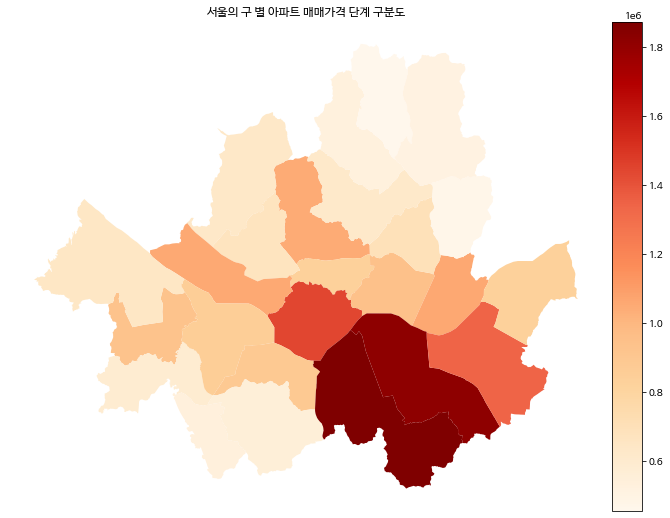

In [138]:
#geopandas 단계 구분도 시각화

from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1, 1)
plt.rcParams["figure.figsize"] = (20,10)
seoul.geometry = seoul.buffer(0.001)

#범례

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.1)

#시각화

seoul.plot(column='value', ax=ax,legend=True, cax=cax, cmap="OrRd")
ax.set_title("서울의 구 별 아파트 매매가격 단계 구분도")
ax.set_axis_off()
plt.show()

#####경기

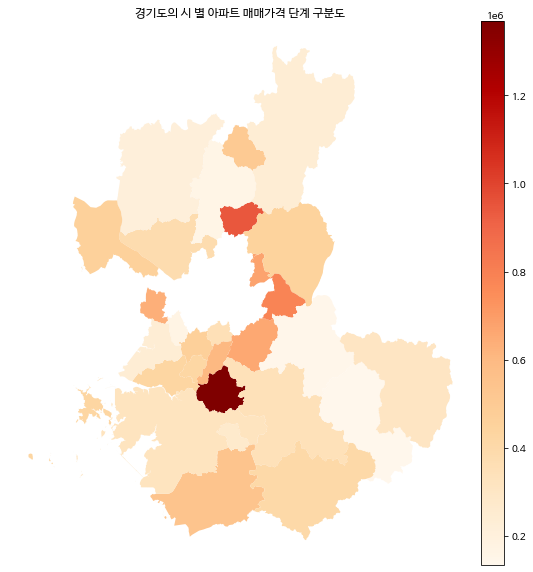

In [139]:
#geopandas 단계 구분도 시각화

from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1, 1)
plt.rcParams["figure.figsize"] = (20,10)
G.geometry = G.buffer(0.001)

#범례
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.1)

#시각화
G.plot(column='value', ax=ax,legend=True, cax=cax, cmap="OrRd")
ax.set_title("경기도의 시 별 아파트 매매가격 단계 구분도")
ax.set_axis_off()
plt.show()

###4) 예측 모델

In [166]:
#필요한 칼럼만 추출
#전국, 6대광역시, 서울, 경기

df__ = df[['전국', '서울', '경기', '6대광역시']]
df__.head()

날짜,전국,서울,경기,6대광역시
날짜,,,,
2012-01-01,264474,540954,283106,195186
2012-02-01,264035,538876,282765,194989
2012-03-01,263470,536079,281913,195093
2012-04-01,262630,532409,280914,195037
2012-05-01,261823,529733,279776,194851


In [167]:
#RNN을 위한 설정

SEQUENCE_LENGTH = 50
OFFSET = 1
BATCH_SIZE = 32

In [168]:
#DataFrame to Numpy

raw_data = df__.to_numpy()
print(raw_data.shape)

(114, 4)


In [169]:
#데이터 normalization을 위한 최대, 최소 확인

mins = raw_data.min(axis=0)
print(mins)
maxs = raw_data.max(axis=0)
print(maxs)

[248058 488116 260103 190763]
[426064 928126 475895 343728]


In [170]:
#normalization (데이터 정규화)

normalized = (raw_data - mins) / (maxs - mins)

In [171]:
#Training data와 Test data 구분

raw_x = []
raw_y = []

for i in range(len(normalized)):
  if i+SEQUENCE_LENGTH+OFFSET >= len(normalized): break
  raw_x.append(normalized[i:i+SEQUENCE_LENGTH,:])
  raw_y.append(normalized[i+SEQUENCE_LENGTH+OFFSET-1,:])

In [172]:
x = np.array(raw_x)
y = np.array(raw_y)

from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.1, shuffle=True)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_15 (GRU)                (None, 50, 128)           51456     
                                                                 
 gru_16 (GRU)                (None, 128)               99072     
                                                                 
 dense_7 (Dense)             (None, 4)                 516       
                                                                 
Total params: 151,044
Trainable params: 151,044
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
2/2 [==============================] - 6s 1s/step - loss: 0.2859 - mape: 92.7387 - val_loss: 0.0637 - val_mape: 57.1521
Epoch 2/50
2/2 [==============================] - 0s 133ms/step - loss: 0.1033 - mape: 52.9327 - val_loss: 0.0085 - val_mape: 22.5026
Epoch 3/50
2/2 [==============================]

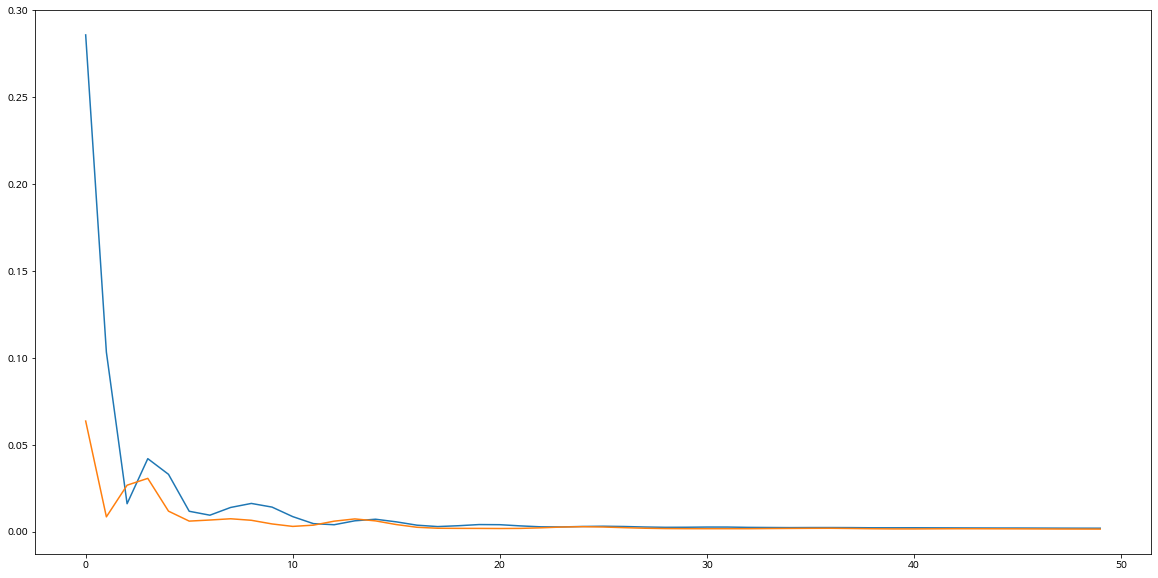

1/1 [==============================] - 0s 33ms/step - loss: 0.0011 - mape: 8.8561
loss = 0.0010557726491242647
mape = 8.856119155883789


In [173]:
#GRU 모델을 활용한 데이터 학습


from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten
from tensorflow.keras.layers import Bidirectional, LSTM, GRU

input_shape = train_x.shape[1:]
output_shape = train_y.shape[-1]

model = keras.Sequential()
model.add(GRU(128, input_shape=input_shape, return_sequences='True'))
model.add(GRU(128))
model.add(Dense(output_shape))
model.compile(loss="mse", optimizer='adam', metrics=['mape'])
model.summary()

#50회 반복 학습
history = model.fit(train_x, train_y, epochs=50, verbose=1, validation_split=0.1, batch_size=BATCH_SIZE)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

loss, mape = model.evaluate(test_x, test_y)
print("loss =", loss)
print("mape =", mape)

In [174]:
#denormalization

y_ = model.predict(test_x).squeeze()

denormalized_test_y = test_y * (maxs - mins) + mins
denormalized_y_ = y_ * (maxs - mins) + mins

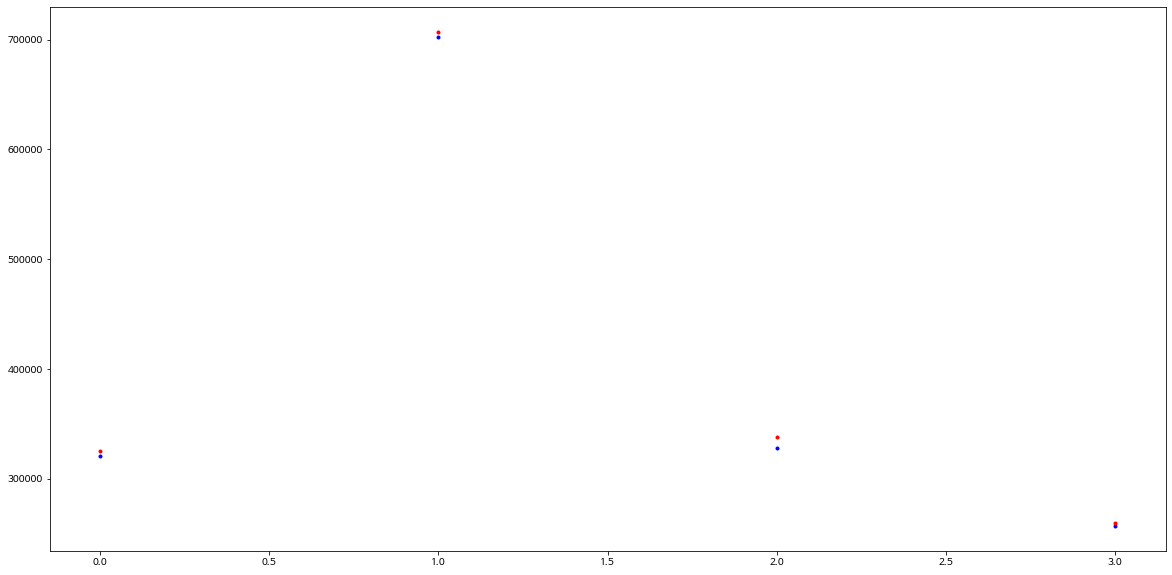

In [175]:
#denormalized Value 확인

plt.plot(denormalized_test_y[0], 'b.')
plt.plot(denormalized_y_[0], 'r.')
plt.show()

(50,)


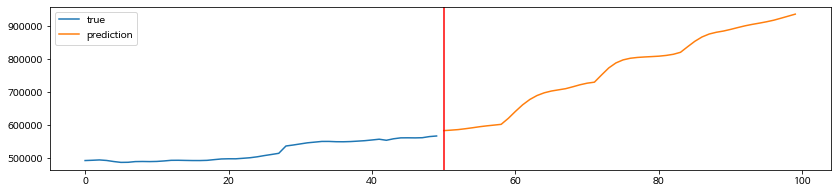

In [176]:
#예측 모델을 활용한 예측

true_data = np.array(raw_x)[-50:,1,1]

denom_true_data = true_data * (maxs[1] - mins[1]) + mins[1]
plt.figure(figsize=(14,3))
print(denom_true_data.shape)
plt.plot(denom_true_data, label="true")

predict_data = np.array(raw_x)[-50:,:]
y_data = model.predict(predict_data)
denom_y_data = y_data * (maxs - mins) + mins
plt.plot(np.arange(50, 100, 1), denom_y_data[:, 1], label="prediction")
plt.axvline(x=50, color='r')
plt.legend()
plt.show()

###5) heatmap 형식

In [177]:
#라이브러리 설치 후 특정 column 간 상관관계 분석

import seaborn as sns
df[['지방권', '수도권', '6대광역시', '9개도']].corr()

날짜,지방권,수도권,6대광역시,9개도
날짜,,,,
지방권,1.000000,0.952016,0.997511,0.971332
수도권,0.952016,1.000000,0.968590,0.982174
6대광역시,0.997511,0.968590,1.000000,0.980879
9개도,0.971332,0.982174,0.980879,1.000000


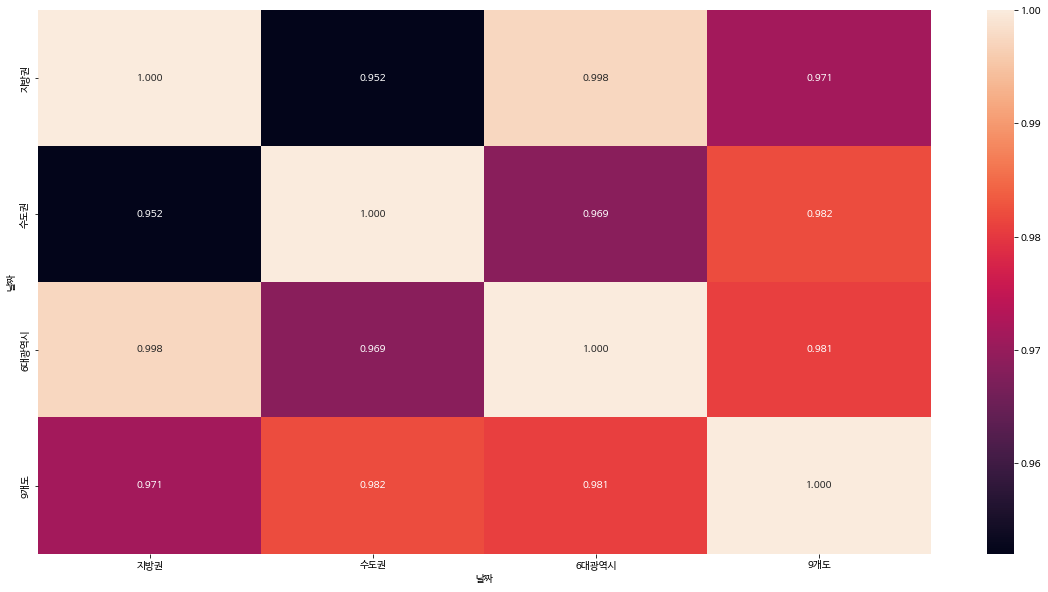

In [178]:
#상관관계 시각화

sns.heatmap(df[['지방권', '수도권', '6대광역시', '9개도']].corr(), annot=True, fmt='0.3f')

###6) Linear Regression

수도권의 아파트 매매 가격에 따른 지방권 아파트 매매 가격

In [179]:
#지방권과 수도권 간의 상관관계 확인

df[['지방권','수도권']].corr()

날짜,지방권,수도권
날짜,,
지방권,1.000000,0.952016
수도권,0.952016,1.000000


In [180]:
#라이브러리 설치

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [181]:
#지방권, 수도권 columns 데이터만 가져오기

df_reg = df[['지방권','수도권']]
df_reg.head()

날짜,지방권,수도권
날짜,,
2012-01-01,163394,365249
2012-02-01,163491,364275
2012-03-01,163849,362790
2012-04-01,164044,360918
2012-05-01,164096,359253


In [182]:
#StandardScaler 적용

std = StandardScaler()
std_df = pd.DataFrame(std.fit_transform(df_reg),columns=df_reg.columns)
std_df

날짜,지방권,수도권
0,-1.209282,-0.599038
1,-1.205220,-0.611213
2,-1.190227,-0.629774
3,-1.182060,-0.653173
4,-1.179882,-0.673985
5,-1.191441,-0.705434
6,-1.208361,-0.736970
7,-1.223606,-0.777268
8,-1.229762,-0.812466
9,-1.229553,-0.843827


In [183]:
#train_test_split 적용

train_x,test_x,train_y,test_y = train_test_split(std_df['수도권'], std_df['지방권'], test_size = 0.3)

In [184]:
#LinearRegression 적용

reg = LinearRegression()
reg.fit(train_x.values.reshape(-1,1), train_y)

LinearRegression()

In [185]:
#정확도 확인

reg.score(test_x.values.reshape(-1,1), test_y)

0.9155896381026445

In [186]:
#값 예측

pred_y = reg.predict(test_x.values.reshape(-1,1))

In [187]:
#기울기, y절편 확인

print(reg.coef_)
print(reg.intercept_)

[0.93483138]
0.007313466605772341


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 8722 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 8722 missing from current font.



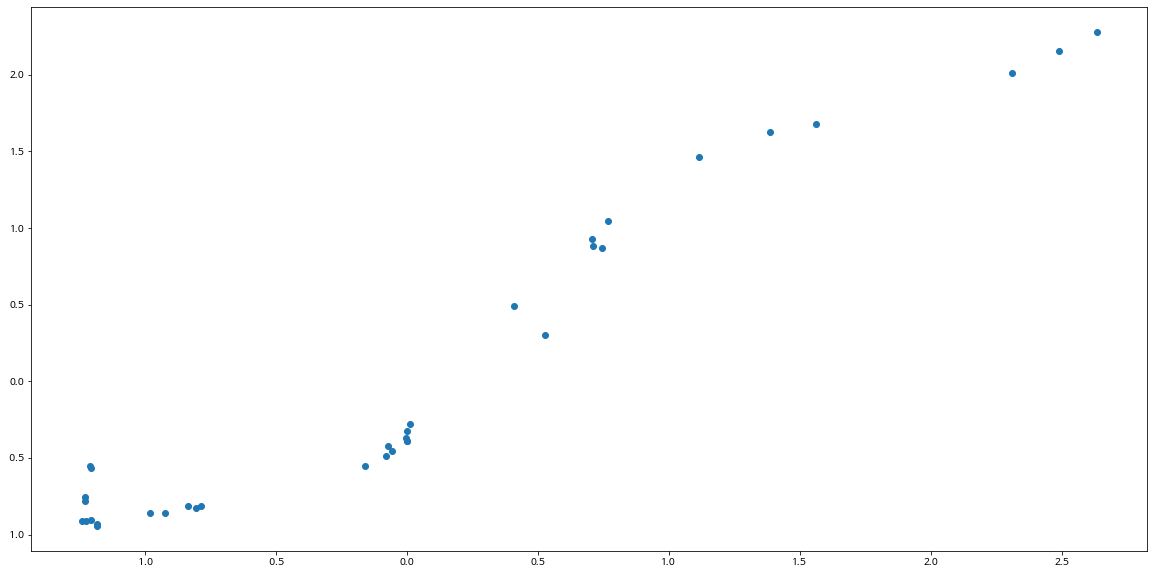

In [188]:
#실제 값 - x축 , 예측 값 - y축으로 하여 scatter형식으로 시각화

plt.scatter(test_y, pred_y)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 8722 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 8722 missing from current font.



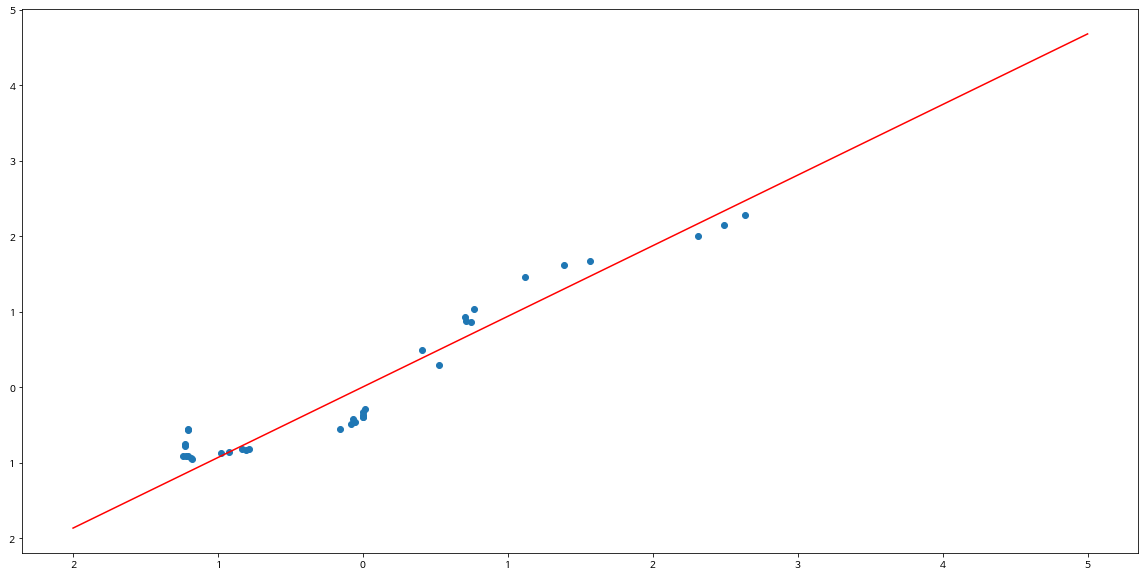

In [189]:
#y = ax+b꼴의 시각화도 함께 나타내기

x = np.linspace(-2,5,10)
plt.plot(x, reg.coef_*x + reg.intercept_, color = 'red')
plt.scatter(test_y, pred_y)

##5.한계